In [208]:
#decision tree regression


In [210]:
import pandas as pd
import numpy as np
### Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
### For Q-Q Plot
import scipy.stats as stats
### To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [212]:
df=pd.read_csv('data\\household_power_consumption.txt',sep=';')
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [214]:
df.shape

(2075259, 9)

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [218]:
#### Taking 50000 samples from this huge dataset
data=df.sample(n=50000,replace=False)
data.reset_index(inplace=True)
data.head()

,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,1521191,7/11/2009,02:35:00,0.228,0.000,245.780,0.800,0.000,0.000,1.0
1,1646254,1/2/2010,22:58:00,2.342,0.066,243.110,9.600,0.000,0.000,19.0
2,1492715,18/10/2009,07:59:00,0.316,0.068,242.460,1.200,0.000,2.000,1.0
3,1433072,6/9/2009,21:56:00,2.566,0.204,239.620,10.600,0.000,0.000,18.0
4,1808561,25/5/2010,16:05:00,0.192,0.000,239.860,0.800,0.000,0.000,0.0


In [220]:
data.drop('index',axis=1,inplace=True)
data.shape

(50000, 9)

In [222]:
#### All the features are of object type except 'Sub_metering_3'. Need to convert all of
data['Date']=pd.to_datetime(data['Date'], format="%d/%m/%Y")
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   50000 non-null  datetime64[ns]
 1   Time                   50000 non-null  object        
 2   Global_active_power    50000 non-null  object        
 3   Global_reactive_power  50000 non-null  object        
 4   Voltage                50000 non-null  object        
 5   Global_intensity       50000 non-null  object        
 6   Sub_metering_1         50000 non-null  object        
 7   Sub_metering_2         50000 non-null  object        
 8   Sub_metering_3         49343 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 3.4+ MB


In [224]:
#### Creating day, month column to reduce dependancy on the 'Date' column
data['day']=data['Date'].dt.day
data['month']=data['Date'].dt.month
data.head()


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,month
0,2009-11-07,02:35:00,0.228,0.000,245.780,0.800,0.000,0.000,1.0,7,11
1,2010-02-01,22:58:00,2.342,0.066,243.110,9.600,0.000,0.000,19.0,1,2
2,2009-10-18,07:59:00,0.316,0.068,242.460,1.200,0.000,2.000,1.0,18,10
3,2009-09-06,21:56:00,2.566,0.204,239.620,10.600,0.000,0.000,18.0,6,9
4,2010-05-25,16:05:00,0.192,0.000,239.860,0.800,0.000,0.000,0.0,25,5


In [226]:
data['year']=data['Date'].dt.year
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,month,year
0,2009-11-07,02:35:00,0.228,0.000,245.780,0.800,0.000,0.000,1.0,7,11,2009
1,2010-02-01,22:58:00,2.342,0.066,243.110,9.600,0.000,0.000,19.0,1,2,2010
2,2009-10-18,07:59:00,0.316,0.068,242.460,1.200,0.000,2.000,1.0,18,10,2009
3,2009-09-06,21:56:00,2.566,0.204,239.620,10.600,0.000,0.000,18.0,6,9,2009
4,2010-05-25,16:05:00,0.192,0.000,239.860,0.800,0.000,0.000,0.0,25,5,2010


In [228]:
#### dropping the date and time column
data.drop(['Date','Time'],axis=1,inplace=True)
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,month,year
0,0.228,0.000,245.780,0.800,0.000,0.000,1.0,7,11,2009
1,2.342,0.066,243.110,9.600,0.000,0.000,19.0,1,2,2010
2,0.316,0.068,242.460,1.200,0.000,2.000,1.0,18,10,2009
3,2.566,0.204,239.620,10.600,0.000,0.000,18.0,6,9,2009
4,0.192,0.000,239.860,0.800,0.000,0.000,0.0,25,5,2010


In [234]:
#### Checking null values in terms of '?'
for features in data.columns:
 c=0
 for values in data[features]:
     if values=='?':
         c+=1
 print(f'{features} has {c} null values')

Global_active_power has 657 null values
Global_reactive_power has 657 null values
Voltage has 657 null values
Global_intensity has 657 null values
Sub_metering_1 has 657 null values
Sub_metering_2 has 657 null values
Sub_metering_3 has 0 null values
day has 0 null values
month has 0 null values
year has 0 null values


In [236]:
#### handling null values
data.replace('?',np.nan,inplace=True)
data.isnull().sum()

Global_active_power      657
Global_reactive_power    657
Voltage                  657
Global_intensity         657
Sub_metering_1           657
Sub_metering_2           657
Sub_metering_3           657
day                        0
month                      0
year                       0
dtype: int64

In [238]:
data.dropna(inplace=True)
data.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
day                      0
month                    0
year                     0
dtype: int64

In [240]:

data.shape

(49343, 10)

In [242]:
data.reset_index(inplace=True)
data.head()

,index,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,month,year
0,0,0.228,0.000,245.780,0.800,0.000,0.000,1.0,7,11,2009
1,1,2.342,0.066,243.110,9.600,0.000,0.000,19.0,1,2,2010
2,2,0.316,0.068,242.460,1.200,0.000,2.000,1.0,18,10,2009
3,3,2.566,0.204,239.620,10.600,0.000,0.000,18.0,6,9,2009
4,4,0.192,0.000,239.860,0.800,0.000,0.000,0.0,25,5,2010


In [244]:
data.drop('index',axis=1,inplace=True)
data.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,month,year
0,0.228,0.000,245.780,0.800,0.000,0.000,1.0,7,11,2009
1,2.342,0.066,243.110,9.600,0.000,0.000,19.0,1,2,2010
2,0.316,0.068,242.460,1.200,0.000,2.000,1.0,18,10,2009
3,2.566,0.204,239.620,10.600,0.000,0.000,18.0,6,9,2009
4,0.192,0.000,239.860,0.800,0.000,0.000,0.0,25,5,2010


In [246]:
#### we can now safely convert the features into numerical
for features in data.columns:
 data[features]=data[features].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49343 entries, 0 to 49342
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    49343 non-null  float64
 1   Global_reactive_power  49343 non-null  float64
 2   Voltage                49343 non-null  float64
 3   Global_intensity       49343 non-null  float64
 4   Sub_metering_1         49343 non-null  float64
 5   Sub_metering_2         49343 non-null  float64
 6   Sub_metering_3         49343 non-null  float64
 7   day                    49343 non-null  float64
 8   month                  49343 non-null  float64
 9   year                   49343 non-null  float64
dtypes: float64(10)
memory usage: 3.8 MB


In [248]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Global_active_power,49343.0,1.095559,1.059955,0.078,0.308,0.604,1.532,9.374
Global_reactive_power,49343.0,0.124047,0.112785,0.000,0.048,0.100,0.196,0.986
Voltage,49343.0,240.816421,3.233697,225.120,238.960,241.000,242.880,254.150
Global_intensity,49343.0,4.644395,4.455302,0.200,1.400,2.600,6.400,41.400
Sub_metering_1,49343.0,1.110512,6.109532,0.000,0.000,0.000,0.000,76.000
Sub_metering_2,49343.0,1.338488,5.911499,0.000,0.000,0.000,1.000,77.000
Sub_metering_3,49343.0,6.454492,8.445194,0.000,0.000,1.000,17.000,31.000
day,49343.0,15.661431,8.794244,1.000,8.000,16.000,23.000,31.000
month,49343.0,6.451209,3.433262,1.000,3.000,6.000,9.000,12.000
year,49343.0,2008.419330,1.127754,2006.000,2007.000,2008.000,2009.000,2010.000


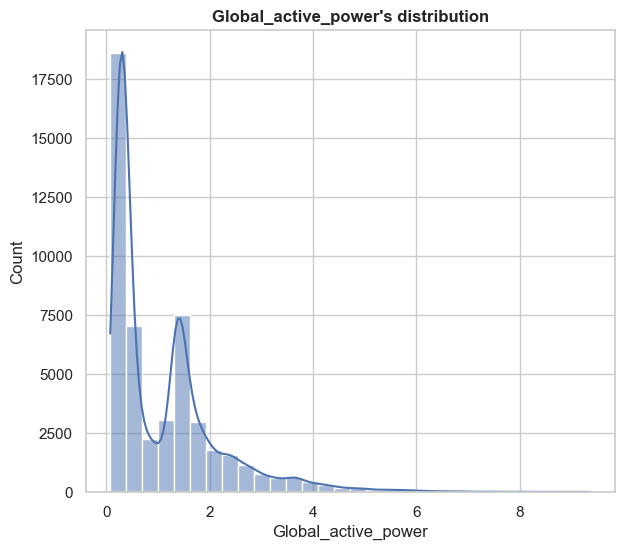

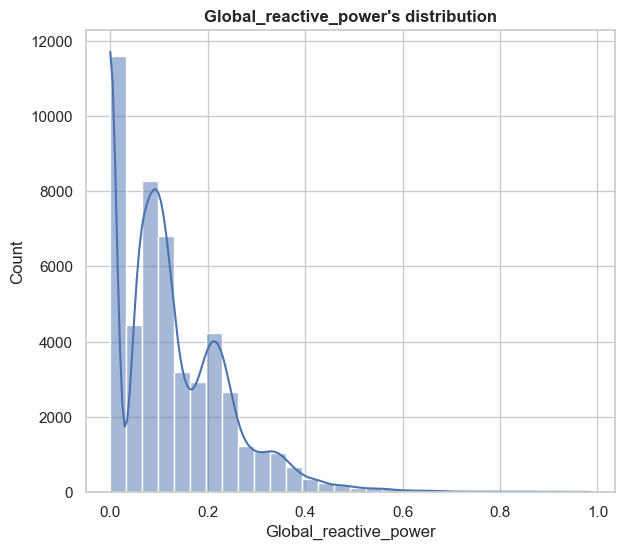

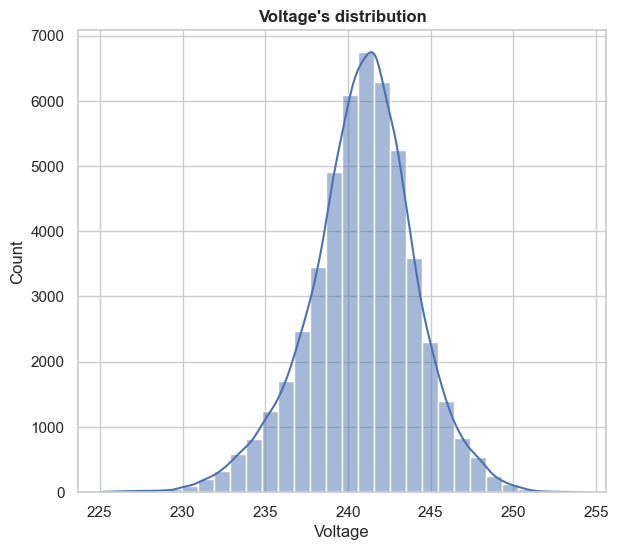

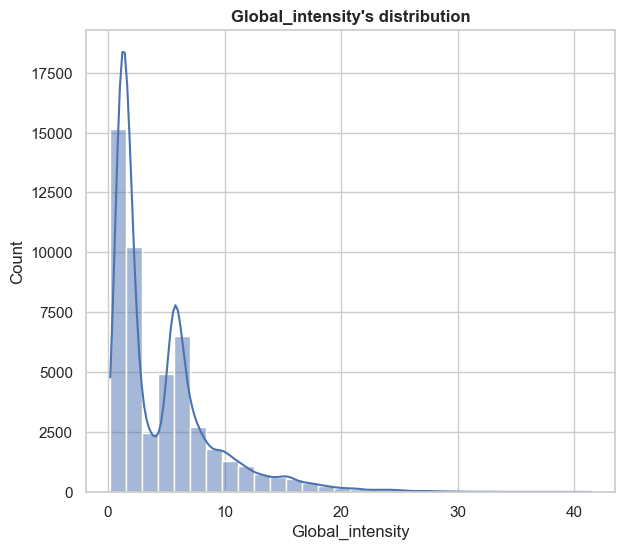

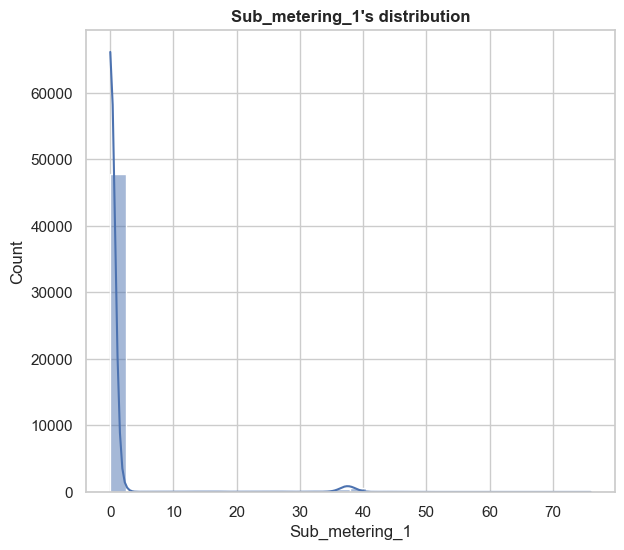

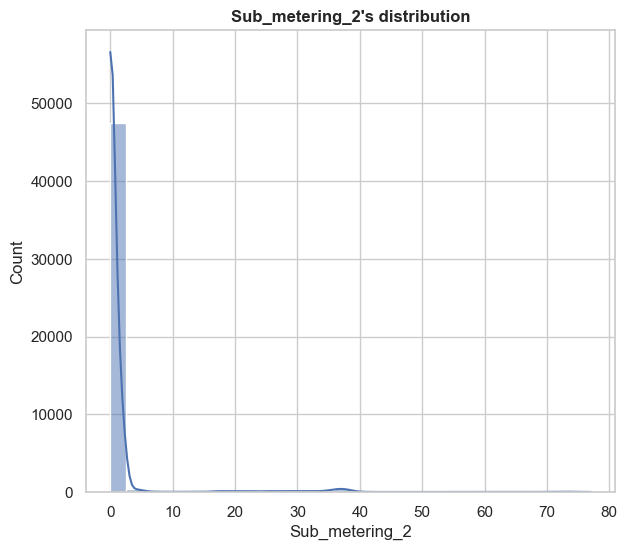

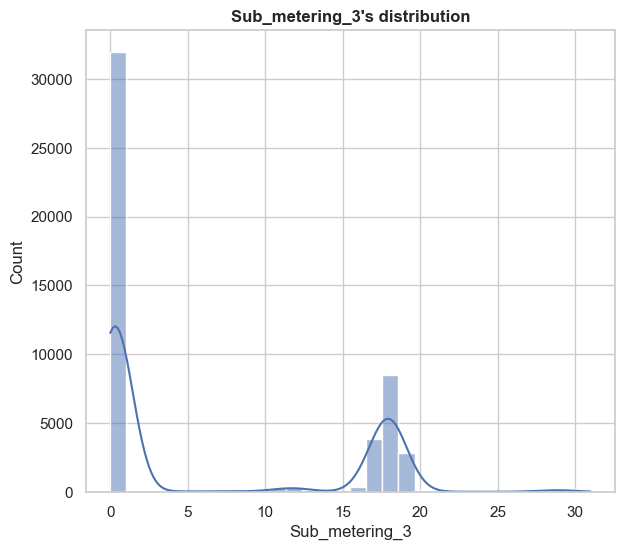

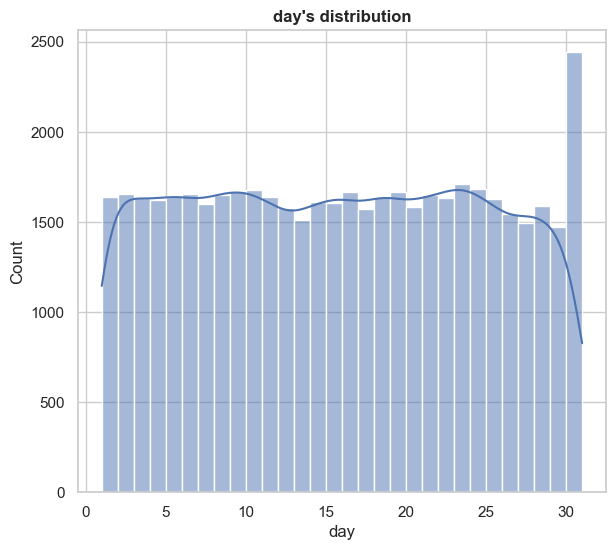

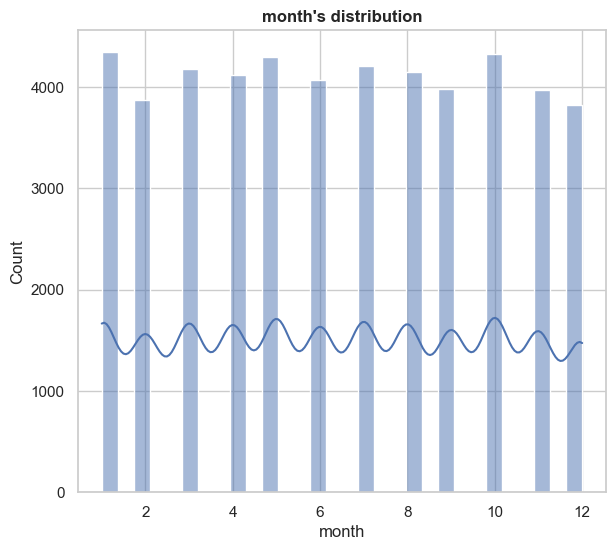

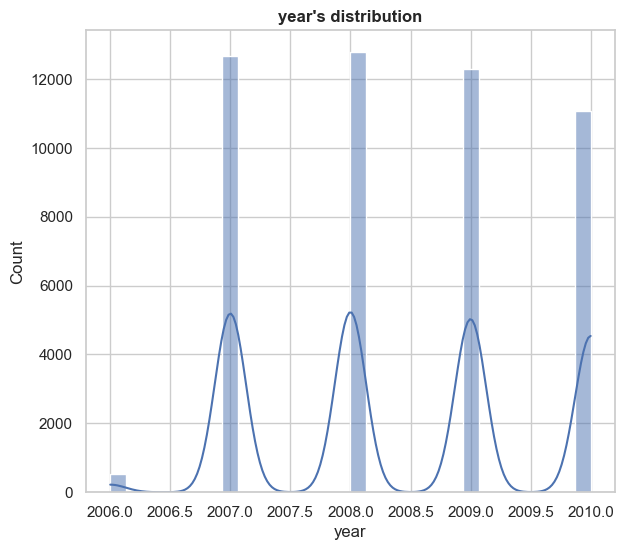

In [250]:
#### Checking the distribution of the dataset
for i in data:
 plt.figure(figsize=(15,6))
 plt.subplot(1,2,2)
 sns.histplot(data=data, x=i, kde=True, bins=30)
 plt.title("{}'s distribution".format(i),fontweight="bold")

In [256]:
#### Crating a dependant feature 'Total_Power_Usage'
data['Total_Power_Usage']=data['Sub_metering_1']+data['Sub_metering_2']+data['Sub_metering_3']
data.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,month,year,Total_Power_Usage
0,0.228,0.000,245.78,0.8,0.0,0.0,1.0,7.0,11.0,2009.0,1.0
1,2.342,0.066,243.11,9.6,0.0,0.0,19.0,1.0,2.0,2010.0,19.0
2,0.316,0.068,242.46,1.2,0.0,2.0,1.0,18.0,10.0,2009.0,3.0
3,2.566,0.204,239.62,10.6,0.0,0.0,18.0,6.0,9.0,2009.0,18.0
4,0.192,0.000,239.86,0.8,0.0,0.0,0.0,25.0,5.0,2010.0,0.0


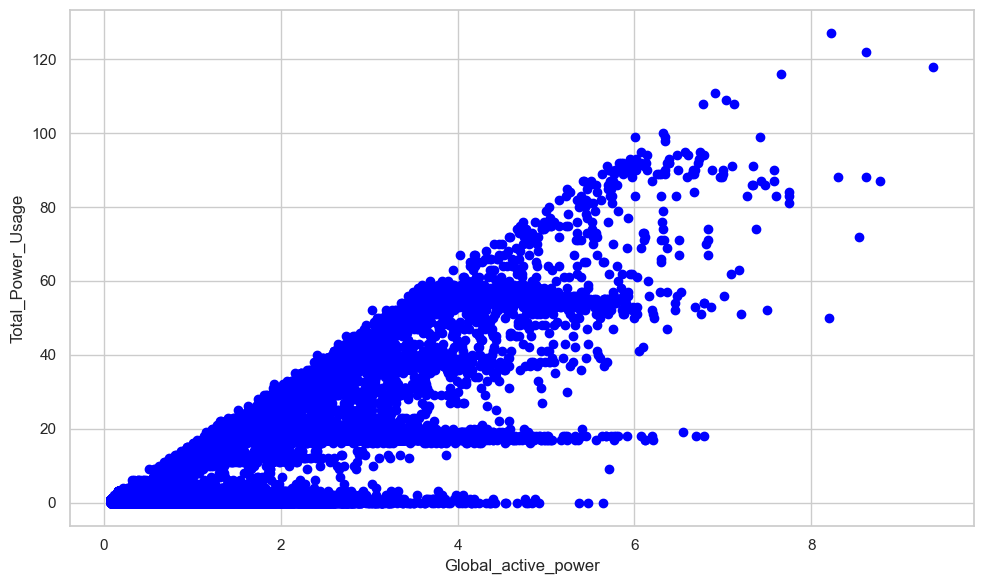

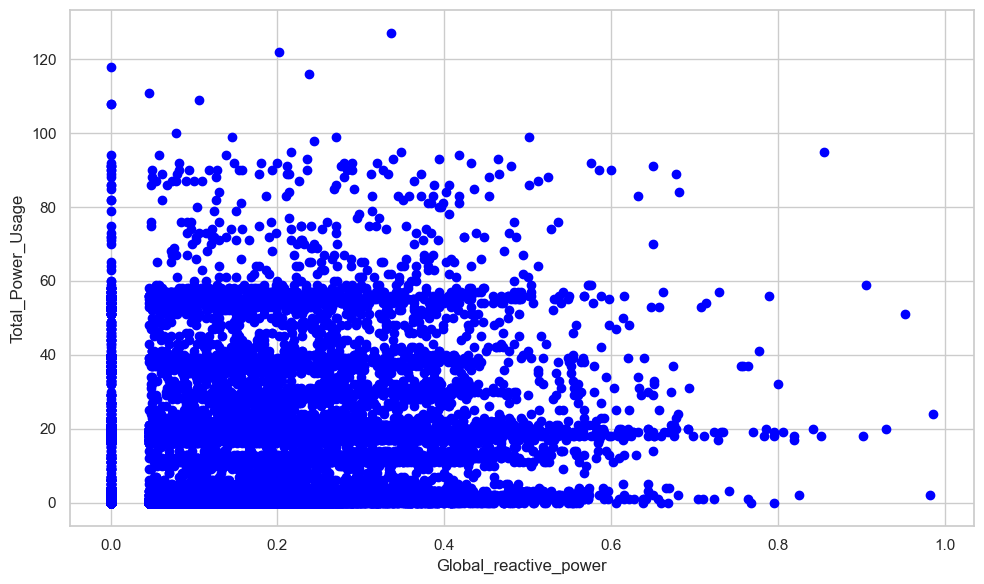

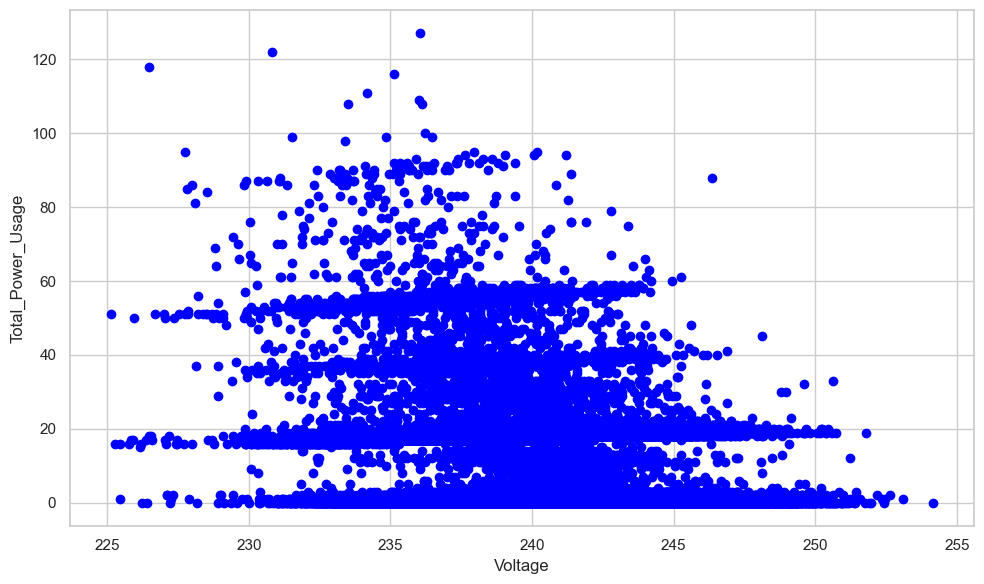

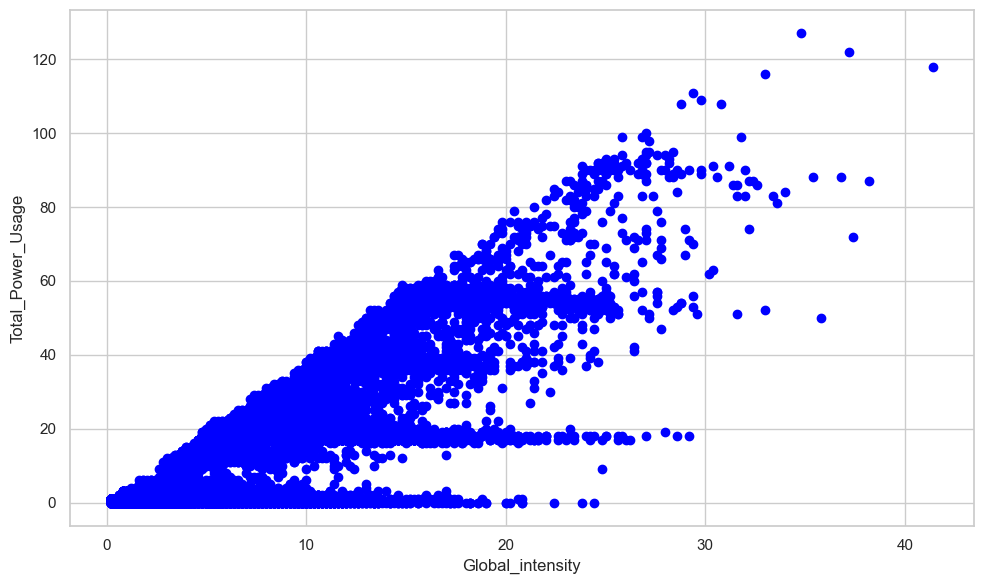

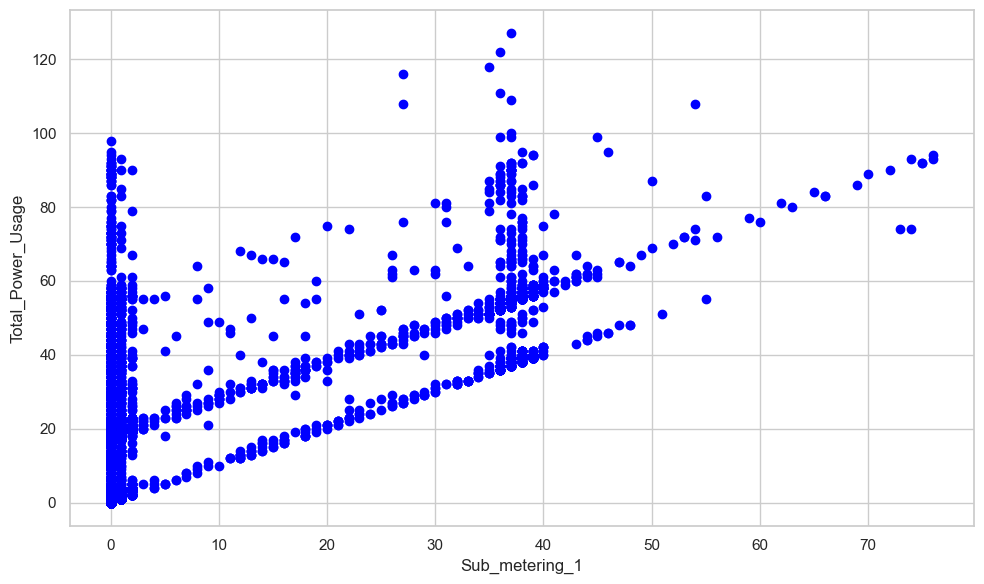

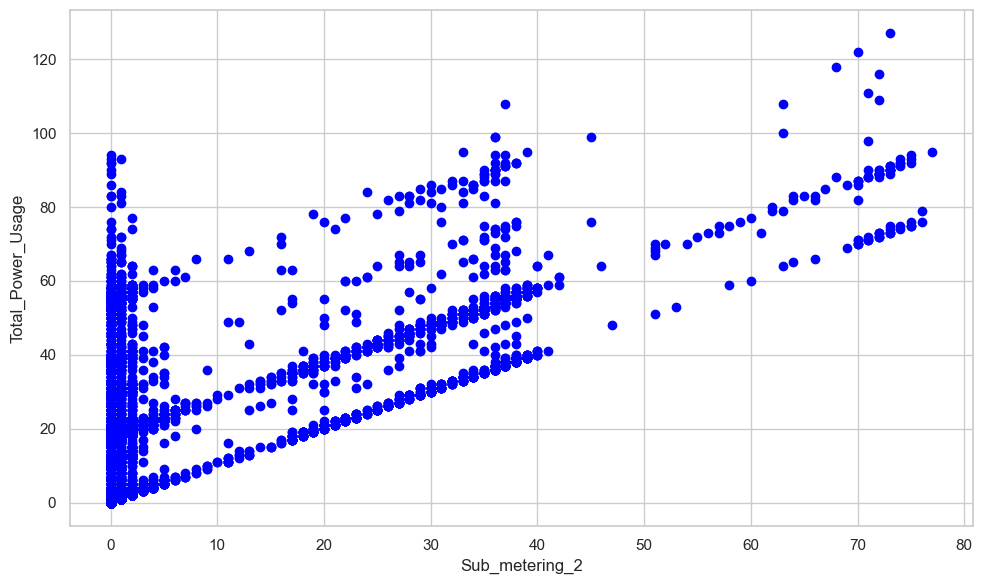

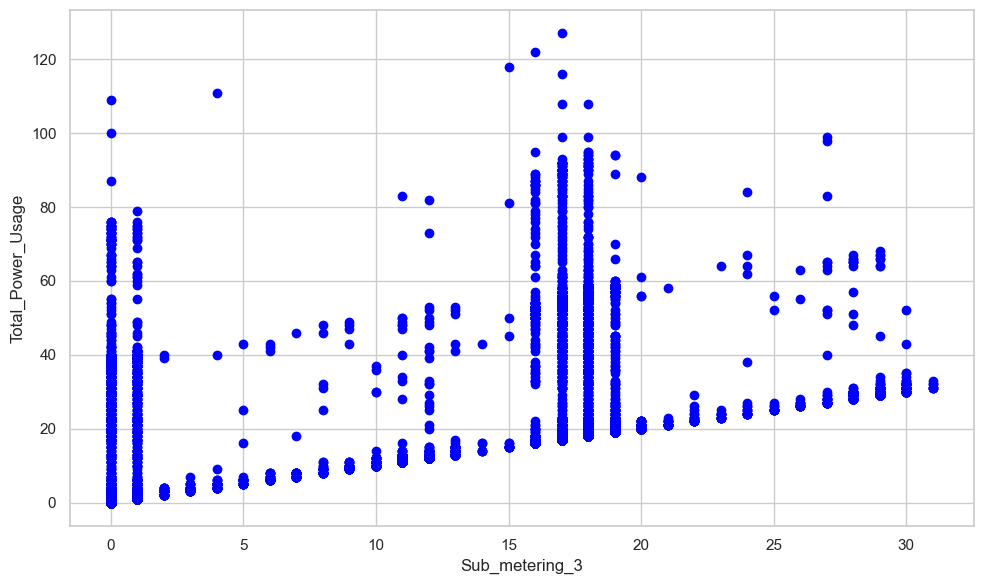

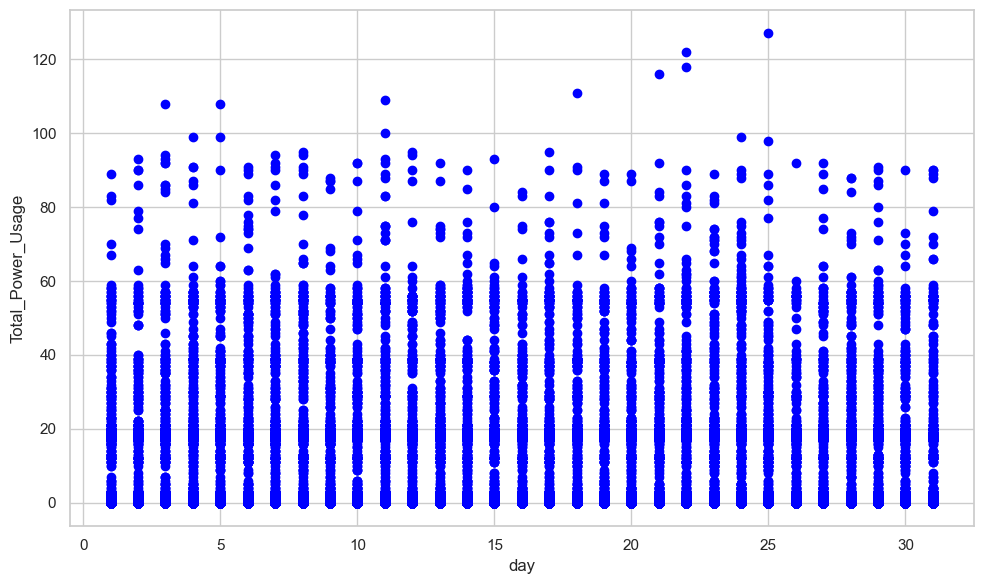

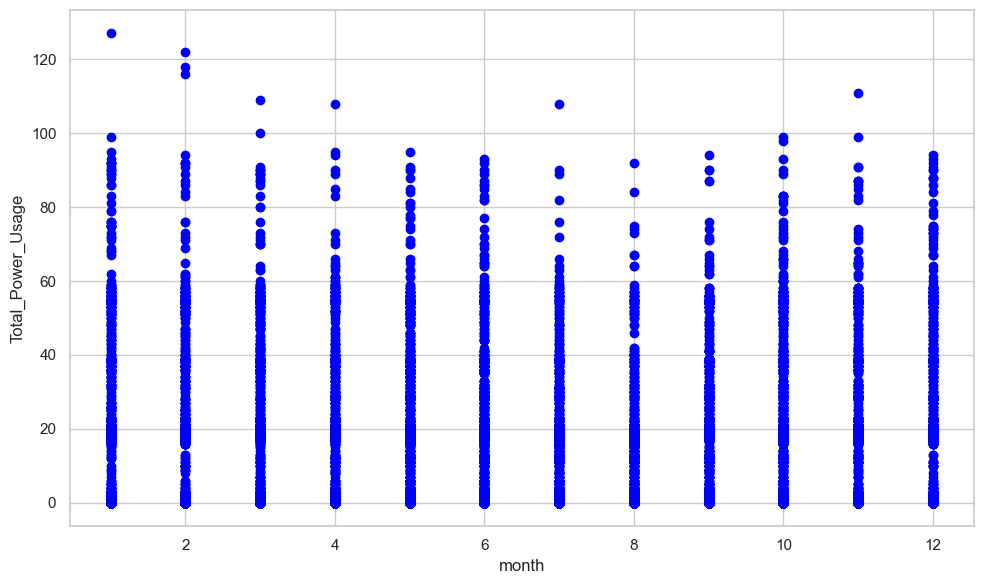

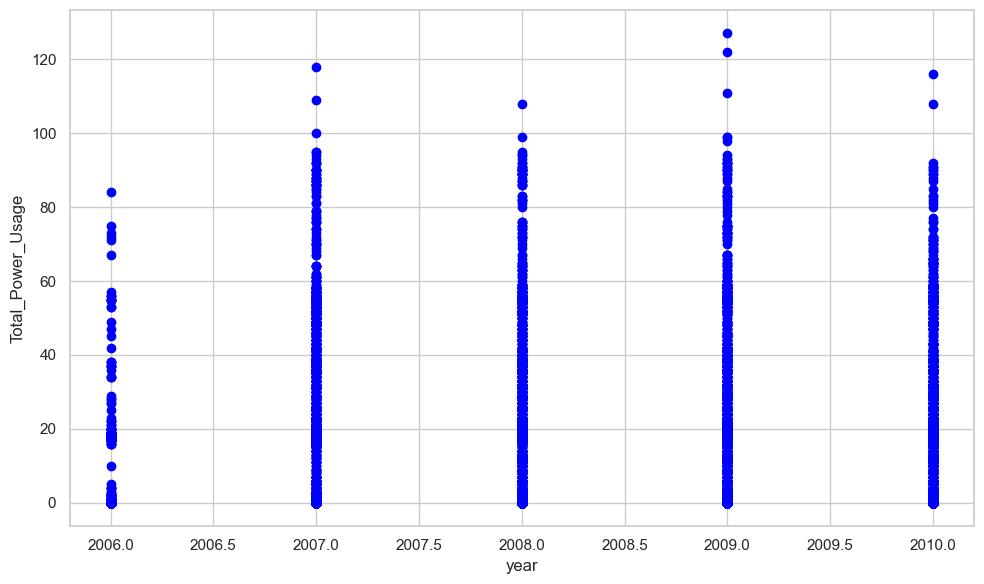

In [260]:
#### Comaparing the features against dependant feature 'Total_Power_Usage'
for features in data:
 plot_num=1
 if features!='Total_Power_Usage':
     plt.figure(figsize=(10,6))
     plt.scatter(x=data[features],y=data['Total_Power_Usage'],c='blue')
     plt.xlabel(features)
     plt.ylabel('Total_Power_Usage')
     plt.tight_layout()
     plot_num+=1


In [262]:
#### Checking correlation between the features
data.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,month,year,Total_Power_Usage
Global_active_power,1.000000,0.245696,-0.397545,0.998890,0.479899,0.438244,0.635572,0.005946,-0.034236,-0.034005,0.845407
Global_reactive_power,0.245696,1.000000,-0.116649,0.265114,0.117111,0.147417,0.089245,0.004141,0.027790,0.044740,0.181705
Voltage,-0.397545,-0.116649,1.000000,-0.409021,-0.192873,-0.169583,-0.265987,0.020922,-0.016161,0.257286,-0.343682
Global_intensity,0.998890,0.265114,-0.409021,1.000000,0.484833,0.444394,0.623578,0.005598,-0.032989,-0.037911,0.842706
Sub_metering_1,0.479899,0.117111,-0.192873,0.484833,1.000000,0.058529,0.103114,-0.004320,-0.010132,-0.005879,0.568747
Sub_metering_2,0.438244,0.147417,-0.169583,0.444394,0.058529,1.000000,0.074843,0.005006,-0.013052,-0.030724,0.535738
Sub_metering_3,0.635572,0.089245,-0.265987,0.623578,0.103114,0.074843,1.000000,0.007638,-0.025840,0.060214,0.738855
day,0.005946,0.004141,0.020922,0.005598,-0.004320,0.005006,0.007638,1.000000,0.013555,-0.027290,0.005256
month,-0.034236,0.027790,-0.016161,-0.032989,-0.010132,-0.013052,-0.025840,0.013555,1.000000,-0.090538,-0.027736
year,-0.034005,0.044740,0.257286,-0.037911,-0.005879,-0.030724,0.060214,-0.027290,-0.090538,1.000000,0.022589


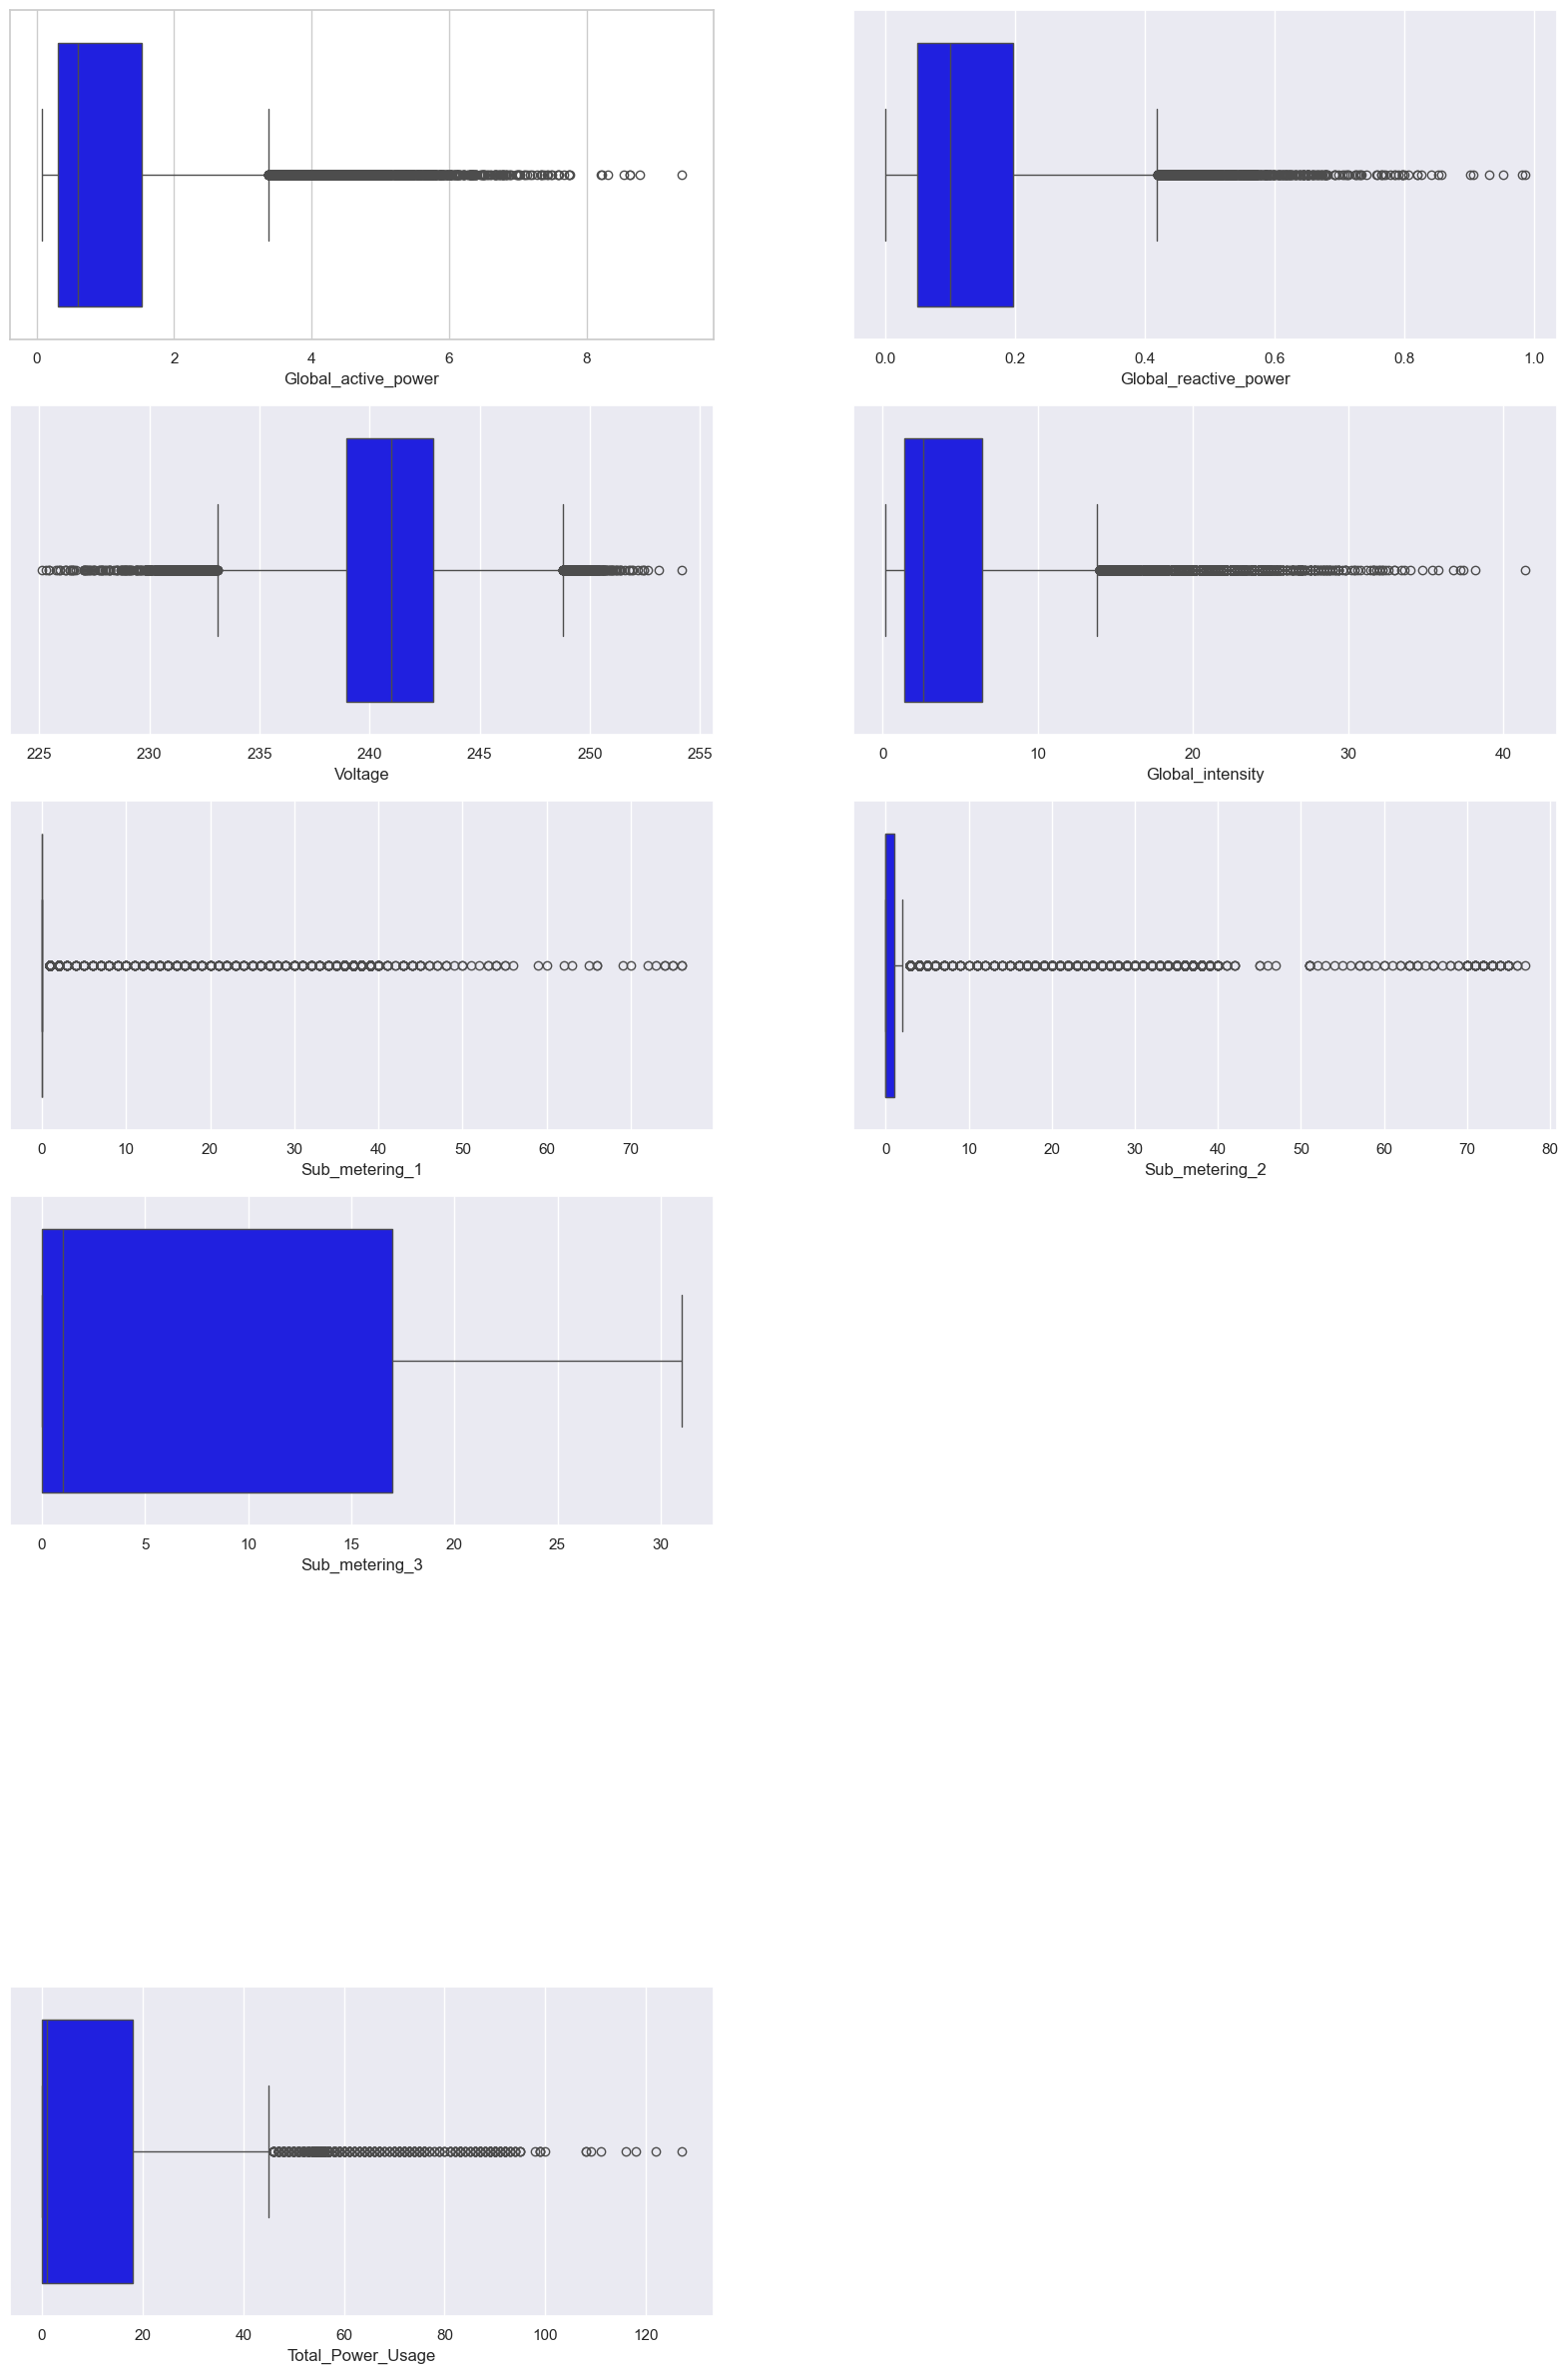

In [266]:
#### Visualising outliers using boxplot
plt.figure(figsize=(20,30))
for features in enumerate(data.columns):
 if features[1] not in ['day','month','year']:
     plt.subplot(6,2,features[0]+1)
     sns.set(rc={'figure.figsize':(10,8)})
     sns.boxplot(data=data,x=features[1],color='blue')
     plt.xlabel(features[1])

In [276]:
#### From the above plot it is very evident that the data contains a lot of out liers. W
def outlier_handle(feature):
 q1=data[feature].quantile(0.25)
 q3=data[feature].quantile(0.75)
 IQR=q3-q1
 lower_limit=q1-1.5*IQR
 upper_limit=q3+1.5*IQR
 index_to_drop=list(data[(data[feature]<lower_limit)|(data[feature]>upper_limit)].index)
 data.drop(index_to_drop,inplace=True)
 return 'Outliers Removed'

In [278]:
#### We are going to pass the features one by one to our function to remove outliers
for features in data.columns:
 if features not in ['day','month','year']:
     outlier_handle(features)

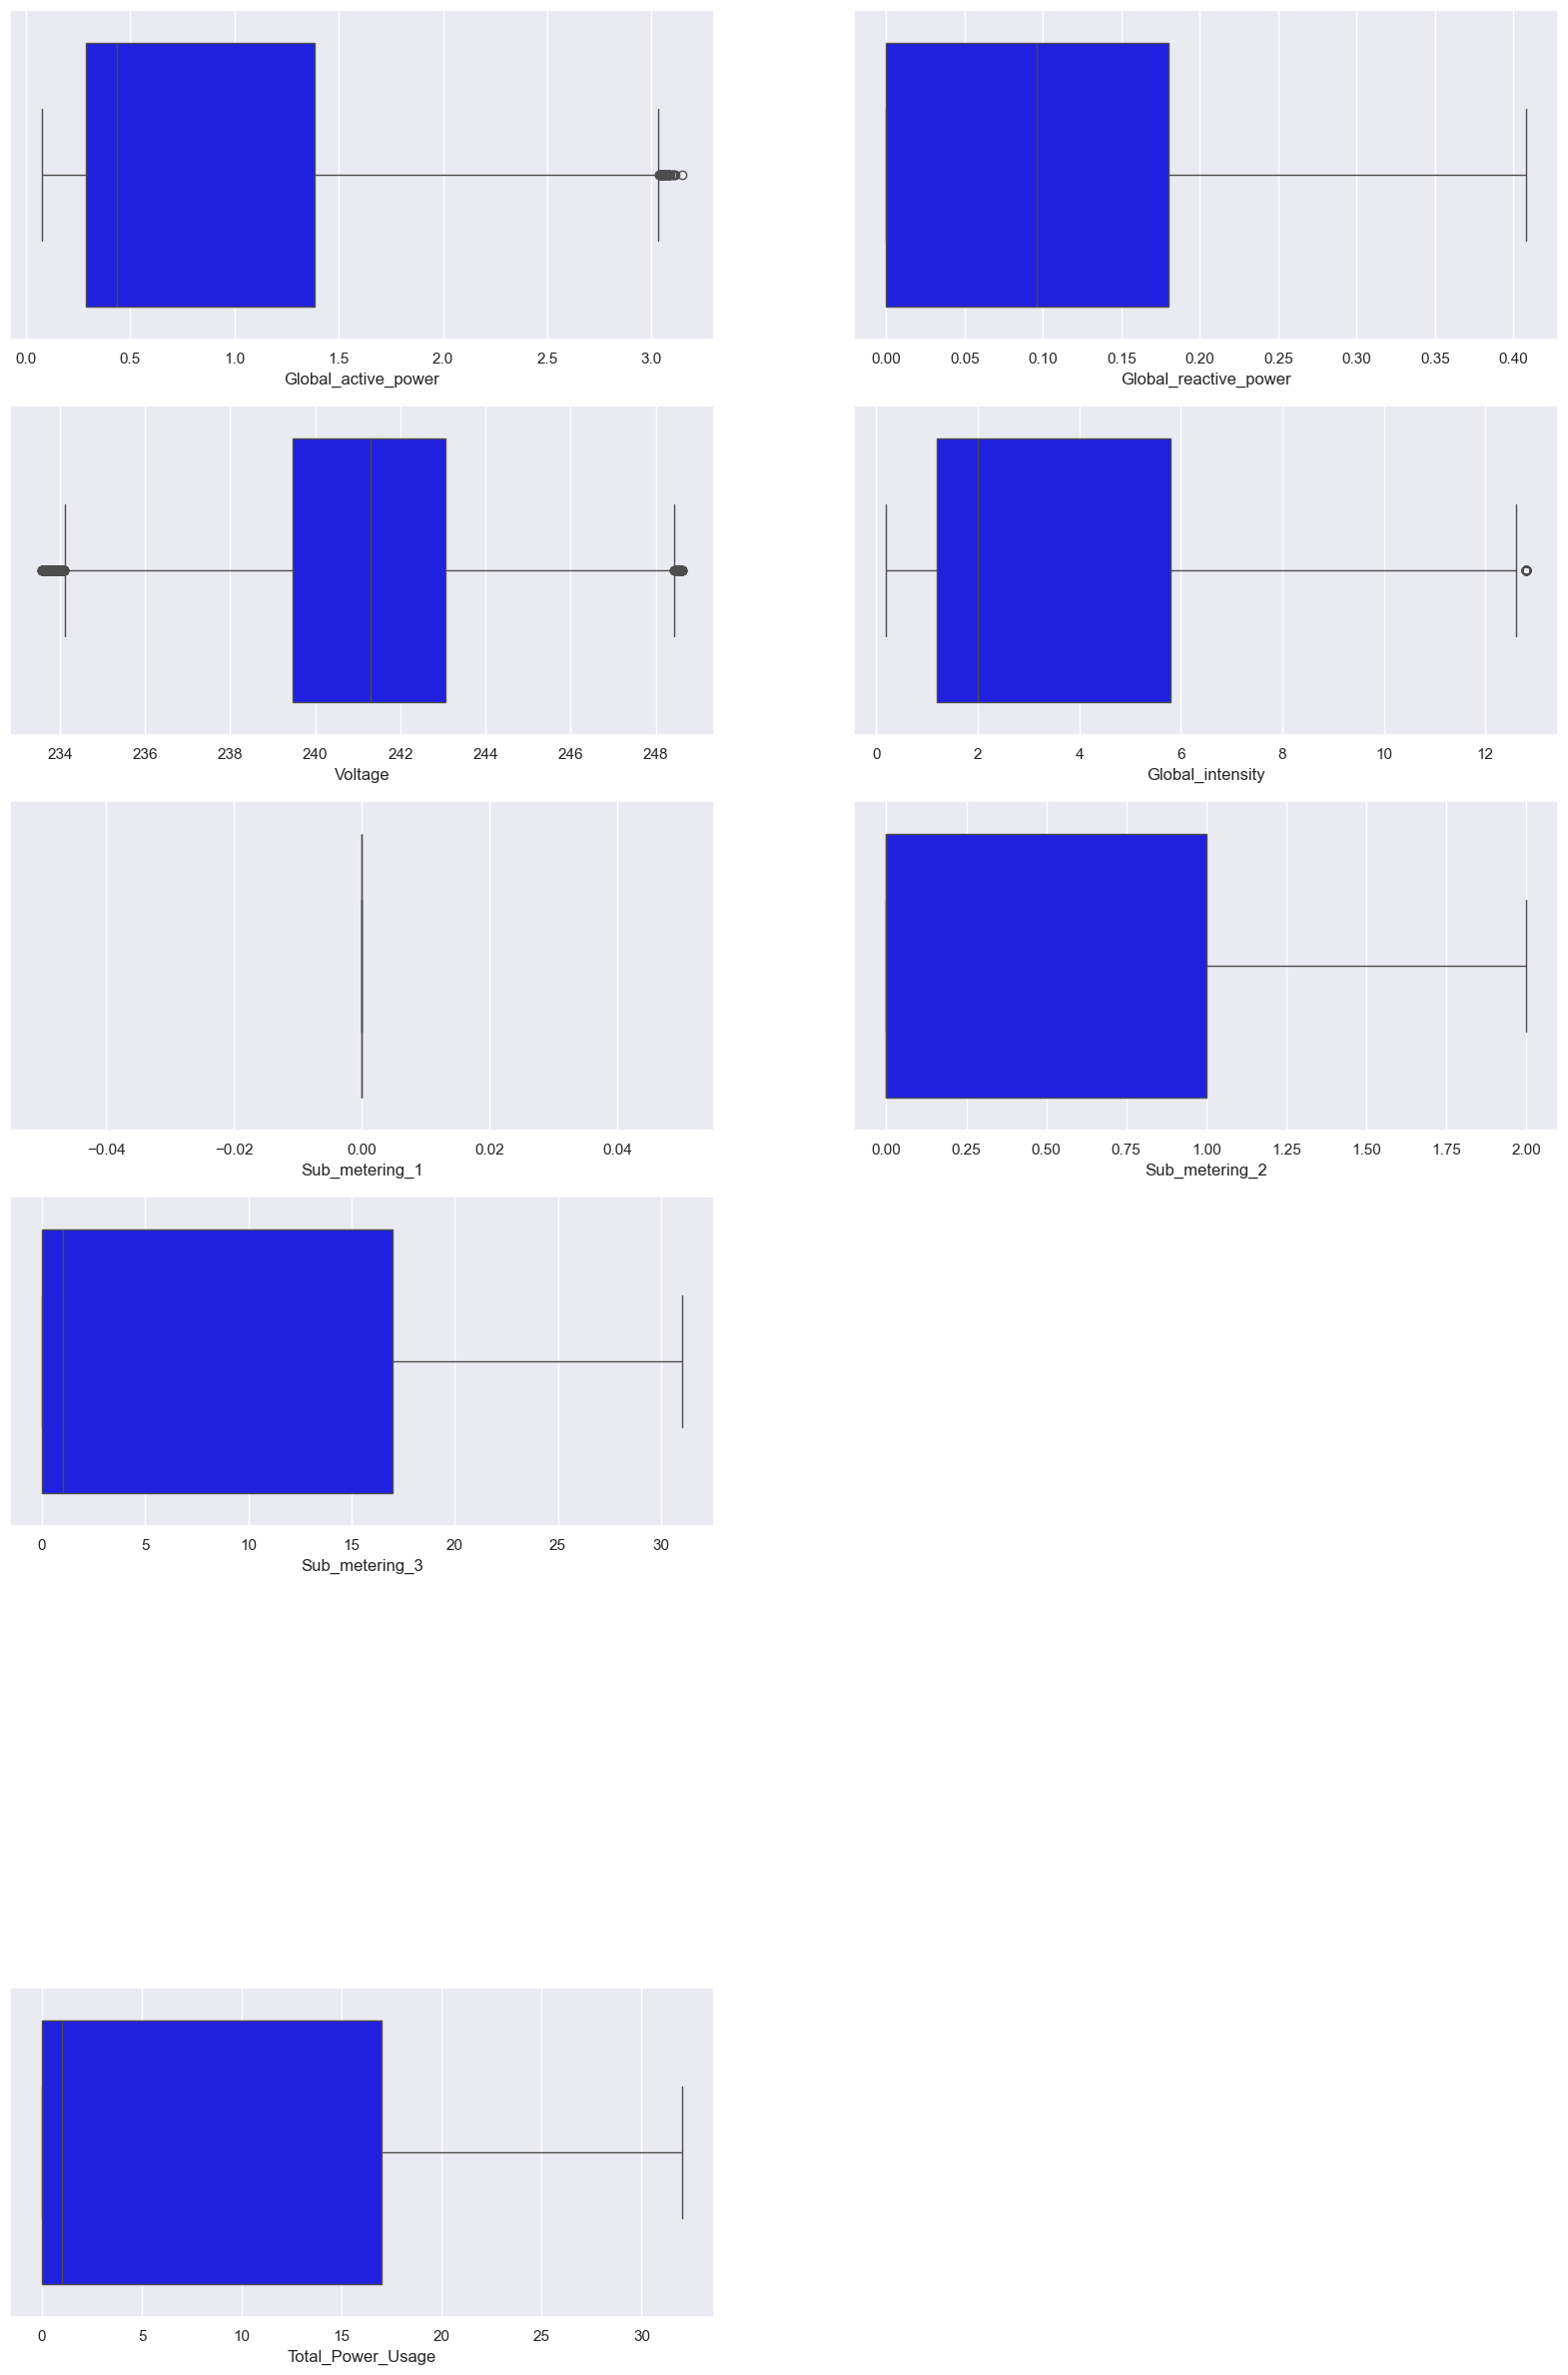

In [282]:
#### Checking the boxplot post outlier removal
plt.figure(figsize=(20,30))
for features in enumerate(data.columns):
 if features[1] not in ['day','month','year']:
     plt.subplot(6,2,features[0]+1)
     sns.set(rc={'figure.figsize':(10,8)})
     sns.boxplot(data=data,x=features[1],color='blue')
     plt.xlabel(features[1])

In [284]:
#### Removing duplicate data
data.duplicated().sum()

25

In [286]:
data.drop_duplicates(inplace=True)
data.reset_index(inplace=True)
data.duplicated().sum()


0

In [288]:
data.drop('index',axis=1,inplace=True)
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,month,year,Total_Power_Usage
0,0.228,0.000,245.78,0.8,0.0,0.0,1.0,7.0,11.0,2009.0,1.0
1,2.342,0.066,243.11,9.6,0.0,0.0,19.0,1.0,2.0,2010.0,19.0
2,0.316,0.068,242.46,1.2,0.0,2.0,1.0,18.0,10.0,2009.0,3.0
3,2.566,0.204,239.62,10.6,0.0,0.0,18.0,6.0,9.0,2009.0,18.0
4,0.192,0.000,239.86,0.8,0.0,0.0,0.0,25.0,5.0,2010.0,0.0


In [290]:
#### Splitting Dependent and Independent columns
X=data.drop('Total_Power_Usage',axis=1)
y=data['Total_Power_Usage']
X.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,month,year
0,0.228,0.000,245.78,0.8,0.0,0.0,1.0,7.0,11.0,2009.0
1,2.342,0.066,243.11,9.6,0.0,0.0,19.0,1.0,2.0,2010.0
2,0.316,0.068,242.46,1.2,0.0,2.0,1.0,18.0,10.0,2009.0
3,2.566,0.204,239.62,10.6,0.0,0.0,18.0,6.0,9.0,2009.0
4,0.192,0.000,239.86,0.8,0.0,0.0,0.0,25.0,5.0,2010.0


In [292]:
y.head()

0     1.0
1    19.0
2     3.0
3    18.0
4     0.0
Name: Total_Power_Usage, dtype: float64

In [294]:
#### Splitting the training and test data
from sklearn.model_selection import train_test_split,GridSearchCV
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=10)

In [296]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()

In [300]:
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [302]:
model.score(X_train,y_train)

1.0

[Text(0.4125, 0.9166666666666666, 'x[6] <= 9.5\nsquared_error = 65.805\nsamples = 27723\nvalue = 5.904'),
 Text(0.145, 0.75, 'x[5] <= 0.5\nsquared_error = 0.98\nsamples = 19579\nvalue = 0.769'),
 Text(0.06, 0.5833333333333334, 'x[6] <= 0.5\nsquared_error = 0.538\nsamples = 14252\nvalue = 0.396'),
 Text(0.04, 0.4166666666666667, 'squared_error = 0.0\nsamples = 9253\nvalue = 0.0'),
 Text(0.08, 0.4166666666666667, 'x[6] <= 3.5\nsquared_error = 0.708\nsamples = 4999\nvalue = 1.128'),
 Text(0.04, 0.25, 'x[6] <= 1.5\nsquared_error = 0.016\nsamples = 4891\nvalue = 1.01'),
 Text(0.02, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.06, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.12, 0.25, 'x[6] <= 6.5\nsquared_error = 2.62\nsamples = 108\nvalue = 6.491'),
 Text(0.1, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.14, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.23, 0.5833333333333334, 'x[6] <= 0.5\nsquared_error = 0.788\nsamples = 5327\nvalue = 1.769'),
 Text(0.18, 0.4166666666666667, 'x[5]

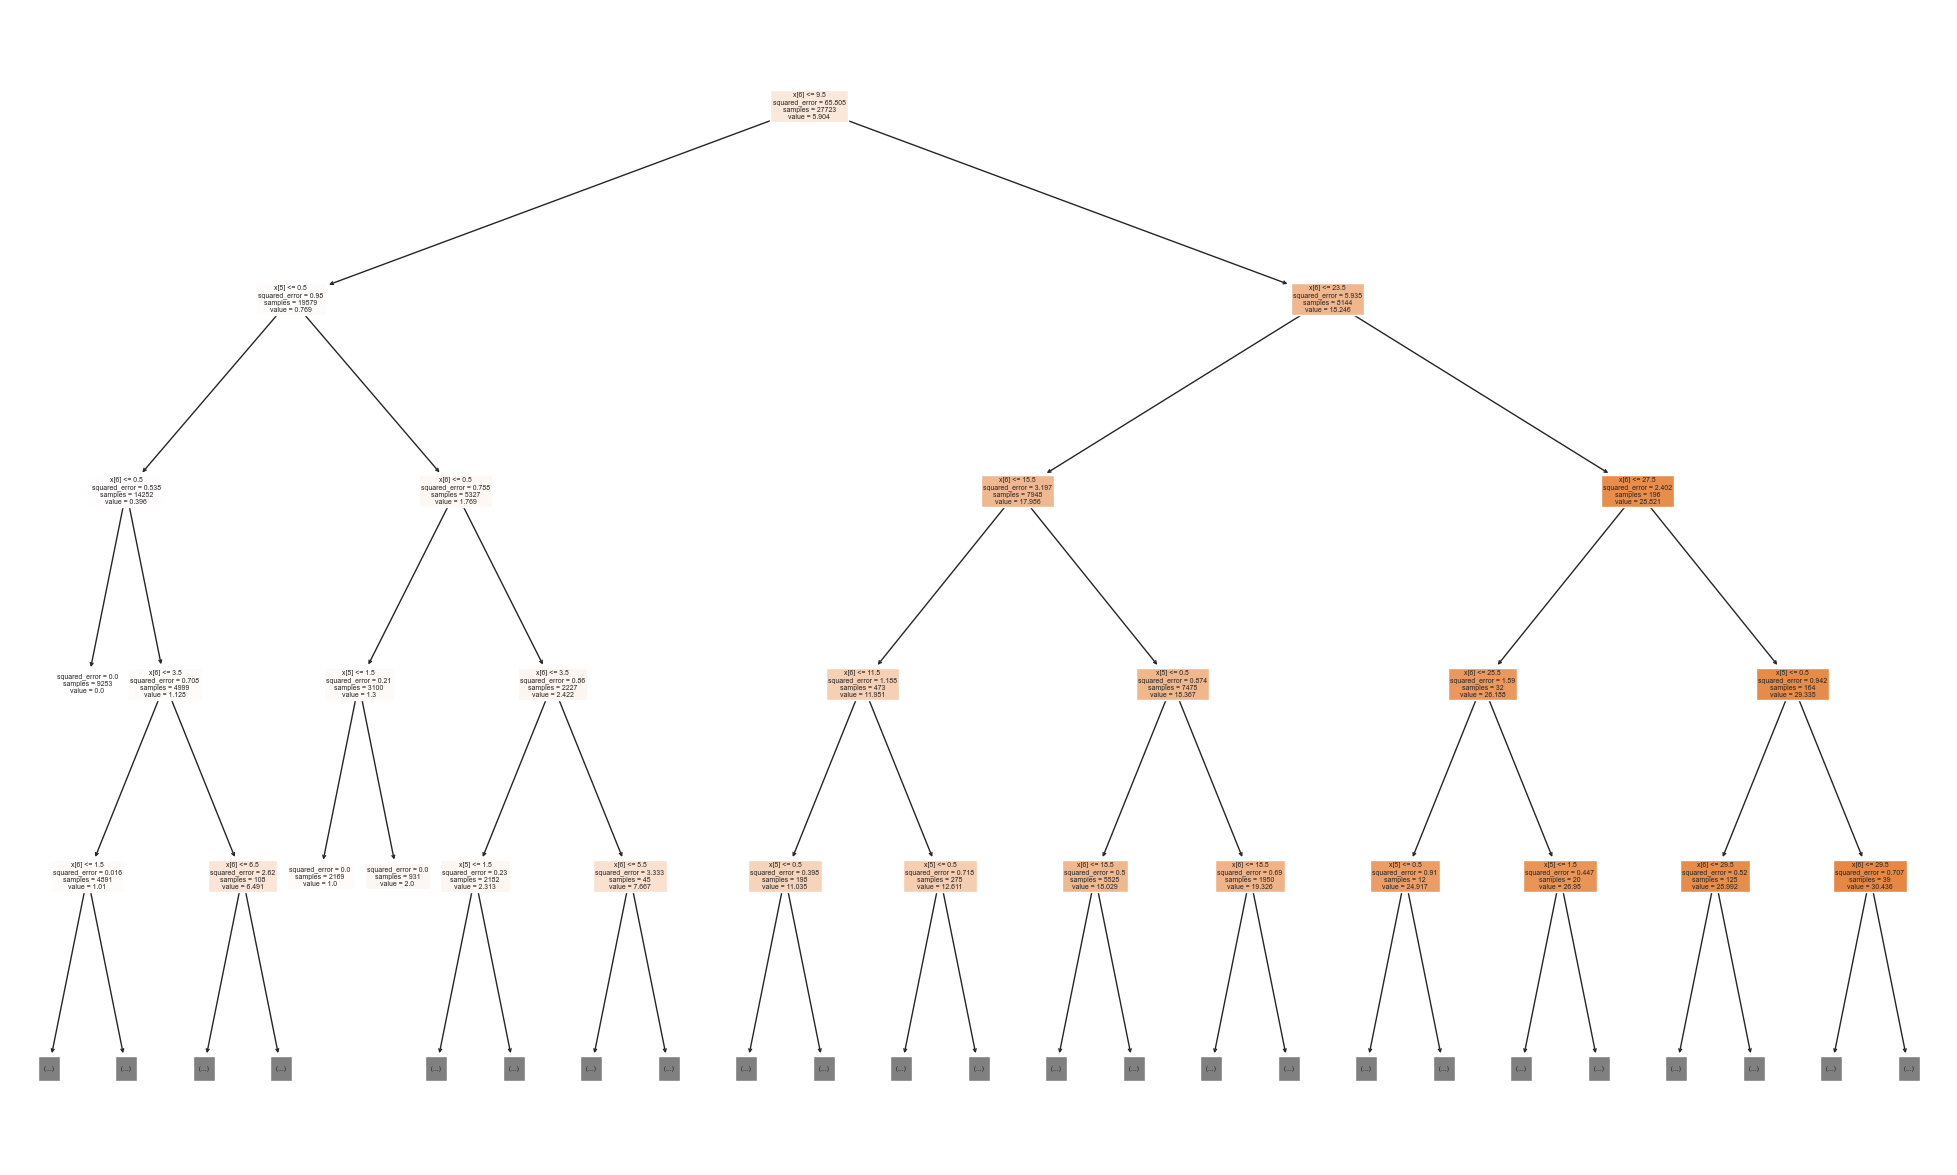

In [304]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model, max_depth=4,filled=True)

In [306]:
y_predict=model.predict(X_test)

In [308]:
from sklearn.metrics import r2_score

In [310]:
r2=r2_score(y_test,y_predict)
print('Our model has', round(r2*100,3),'% accuracy')

Our model has 99.999 % accuracy
